### <div align="center"><span style="font-family:Verdana;"> Quantum Physics
### <div align="center"><span style="font-family:Verdana;"> Practical work 2  
</span >   

# <div align="center"><span style="font-family:Times New Roman;text-decoration:underline;" > Numerical Representation of Infinite Dimensional Systems
### <div align="center"><span style="font-family:Verdana;"> Oveis Mahmoudi (CompuPhys), Hadi Nasser eldini (CompuPhys), Sanjay Sharma (Pics) - $15^{th}$ January, 2022
</span> 

# INTRODUCTION

---



The goal of this practical work is to make a comparison between the *Finite Difference Representation* (FDR) and the Discrete Variable Representation (DVR) for three known quantum systems; Particle in a box, Harmonic Oscillator and $H_2^+$ molecule.



# METHODS

---

For this practical we consider a  quantum particle of mass m described by the Hilbert space $\mathcal{H} = L^2(\mathbb{R},dx)$ and a Hamiltonian $H =\frac{-\hbar^2}{2m}\frac{d^2}{dx^2}+V(x)$. We begin by introducing an approximate finite representation of the system that can be numerically represented. We choose to carry out a spatial truncation by representing the system only on \[0,L\] $\subset \mathbb{R}$. 

There is a regular partition given by $\{x_0, x_1, ..., x_N \}$ where $x_0=0$ and $x_N=L$. The numerical representation of the system is then based on this partition. The points of the partition are called collocation points.

There are two forms of representation which are elaborated below.

## Finite difference representation

The finite difference representation is based on the $\left| x \right>$ represention of the states of $\mathcal{H}$. We choose ($\left| x_i \right>)_{i=0,...,N}$ as the basis of the representation. We have then for $\psi \in \mathcal{H}, \left| \psi \right> \simeq  \sum\limits_{i=0}^N \psi_i\left|x_i\right>$ (with $\psi_i =\left<x_i|\psi \right> = \psi \left|x_i\right>)$.

We can represent the states as:

$$
\left| \psi \right>_{FD} = \begin{pmatrix}
\psi_0 \\
. \\
. \\
\psi_N
\end{pmatrix}
$$

For the action of the potential operator $\hat{V}$ on $\psi$ such that $\hat{V} \psi(x) = V(x)\psi(x)$, this induces a diagonal matrix representation for the potential:

$$
\hat{V}_{FD}=\begin{pmatrix}V(x_{0}) &  & 0\\
 & \ddots\\
0 &  & V(x_{N})
\end{pmatrix}
$$

To represent the Kinetic Hamiltonian $H_K = - \frac{-\hbar^2}{2m}\frac{d^2}{dx^2}$, we use second order taylor developmemts. We can represent the final equation for the Finite Difference Repesentation of the Kinetic Hamiltonian as:

$$
- \frac{-\hbar^2}{2m}\frac{d^2\psi}{dx^2}\bigg\rvert_{x=x_i} \simeq - \frac{-\hbar^2}{2m} \frac{\psi_{i+1} + \psi_{i-1}- 2\psi_i}{\Delta x^2}
$$

so that we get the kinetic Hamiltonian in the format: 

$$
H_{K,FD}=-\frac{\hbar^{2}}{2m\Delta x^{2}}\begin{pmatrix}-2 & 1 & 0 &  & 0\\
1 & -2 & 1\\
 & \ddots & \ddots & \ddots\\
 &  & 1 & -2 & 1\\
0 &  & 0 & 1 & -2
\end{pmatrix}
$$


The finite difference representation of the kinetic part of the hamiltonian is implemented using the following function:



In [ ]:
# Useful libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy import special as sp
from math import factorial,sqrt

def Kinetic_Hamiltonian_FD(NSTEP, DELTAX, MASS):
    '''
    Defining the Kinetic Hamiltonian with the finite difference method
    with order of steps as Nstep+1

    PARAMETERS
    ----------
    NSTEP: int
        the number of cells in the partition
    DELTAX: float
        ∆x, partition step (in atomic unit)
    MASS: float
        particle mass in a.u.
    
    RETURNS
    -------
    HDF: 2D numpy array (NSTEP+1)x(NSTEP+1)
        the kinetic hamiltonian matrix in finite difference representation
    '''
    HFD = -2.*np.identity(NSTEP+1) # HFD initialised as an identity matrix 
    for i in range(0,NSTEP):
        HFD[i,i+1]=1.
        HFD[i+1,i]=1.
    HDF = (-1./(2*MASS*DELTAX**2))*HFD
    return HDF

## DVR/FBR representation

Another form of representation considers two representation for the basis of functions. The Discrete Variable Representation(DVR) basis is such that the operators V(x) are diagonal and the Finite Basis Representation(FB) is such that the differential operators are diagonal.

The DVR basis $(u_i(x))_{i=0,...,N}$ is composed by functions such that $u_i(x_j) = \delta_{ij}$. The behaviour of $u_i(x)$ is almost the same as that of the Dirac distribution. The FBR basis $(\phi_n)_{n=0,...,N}$ is chosen as being the Fourier transform of the DVR basis.

According to the treated system, a basis choice could provide better results than another one. A choice
relatively universal, that we follow for this practical is given below:

$$
u_j(x) = \frac{1}{\sqrt{(N+1)L}}\sum\limits_{n=0}^N e^{ik_n(x-x_j)}
\phi_n(x) = \frac{1}{\sqrt{L}} e^{ik_nx}
$$

where ${(k_n)}_{n=0,...,N}$ are the points of the reciprocal lattice of $\{x_0, x_1, ..., x_N \}$.

This choice is rather natural because it consists of choosing the FBR basis as constituted by the plane waves of the $\left|\hbar k\right>$ - representation. Here, we have an analytic expression of the representation of the kinetic operator in the DVR basis:

$$
[H_{K,DVR}]_{ij} =  \frac{-\hbar^2}{2m} \begin{cases} 
  \frac{\pi^2((N+1)^2+2)}{3L^2} & \mbox{if}  & i=j \\ 
  \frac{(-1)^{j-i} 2 \pi^2}{L^2sin^2((j-i)\pi / (N+1))} & \mbox{if} & i \neq j
  \end{cases} 
$$




We implemented the kinetic part of the hamiltonian using the DVR method in the following function:

In [ ]:
def Kinetic_Hamiltonian_DVR(NSTEP, XMAX, MASS):
    '''
    This function defines the kinetic Hamiltonian with the DVR method
    with order of steps as Nstep+1.

    PARAMETERS
    ----------
    NSTEP: int
        the number of cells in the partition
    XMAX: float
        maximum value of x in a.u.: [0,xmax]
    MASS: float
        particle mass in a.u.
    
    RETURNS
    -------
    HDVR: 2D numpy array
        the kinetic hamiltonian matrix in Discrete Variable Representation
    '''
    HDVR = np.zeros((NSTEP+1,NSTEP+1)) # HDVR must be initialized as a matrix 

    for i in range(0,NSTEP+1):
        for j in range(0,NSTEP+1):
            if(i==j):
                HDVR[i,i] = (np.pi**2)*((NSTEP+1)**2+2)/(3*XMAX**2*2*MASS)
            else:
                HDVR[i,j] =  (-1)**(j-i) * (2*np.pi**2) / (XMAX**2 * 
                            (np.sin((j-i)*np.pi/(NSTEP+1))**2)*2*MASS)
    return HDVR

# Numerical Simulation of Three Quantum Systems

---



In this practical work we aim to make a comparison between three systems:  a particle in a box, a harmonic oscillator and the ion $H^+_2$ molecule.

## PARTICLE IN A BOX

The one particle in a box $[0,x_{max}]$ is described by the potential:
$$
V(x) = \begin{cases} 
  +\infty & \mbox{if}  & x=0 \\ 
  0 & \mbox{if}  & x\in (0,x_{max})\\ 
  +\infty & \mbox{if}  & x=x_{max} \\ 
  \end{cases} 
$$

Because of the difficulty involved in  defining the infinite wall for the numerical simulation, we replace infinity with a very high value, such as $10^{10}$.

The initial parameters required are defined below. For the discretization we need a regular partition sufficiently thin in order not loose too much details. We define the points of this grid by $Xd$.

In [ ]:
'''
Initial parameters
'''
hbar  = 1.                   # (in a.u.)
xmin  = 0.                   # minimum value of x (in a.u.): [0,xmax]
xmax  = 10.                  # maximum value of x (in a.u.): [0,xmax]
m     = 1.                   # particle mass in a.u.
Nstep = 30                   # the number of cells in the partition
DeltaX= (xmax-xmin)/Nstep    # ∆x, partition step (in atomic unit)

Xd = np.linspace(xmin,xmax,Nstep+1) # list of points of the partition

Next, we define the system of a particle in a box, or an infinite well, using the given potential above:

In [ ]:
'''
Defining the potential well
'''
valV_part       = np.zeros(Nstep+1)   # defining a zero matrix for potential
valV_part[0]    = 10**(10)            # Potential is infinity at x=0
valV_part[Nstep]= 10**(10)            # Potential is infinity at x= xmax

We can also make the kinetic part of the hamiltonian using the DFR and DVR and 

In [ ]:
# CONSTRUCTION OF NUMERICAL HAMILTONIANS
Hdf = Kinetic_Hamiltonian_FD(Nstep, DeltaX, m)
Hdvr= Kinetic_Hamiltonian_DVR(Nstep, xmax, m)

### **1) The numerical Hamiltonians and spectrum**

In order to get the total hamiltonian we add the potential that we have already calculated to the numerically calculated kinetic hamiltonians:

In [ ]:
'''
Adding the potential of the potential well to the numerical Hamiltonians
'''          
Vmat_part = np.diag(valV_part) # diagonalising the potential
Hdf_part  = Hdf  + Vmat_part   # adding the potential to the kinetic hamiltonian
Hdvr_part = Hdvr + Vmat_part   # adding the potential to the Hamiltonina calculated using the DVR method

In the following the eigenvalues of the numerically calculated hamiltonians are calculated to get the two spectra: $Sp^{FD}(H)$ and $Sp^{DVR}(H)$:

In [ ]:
'''
Computing the two approximations of
the spectrum of the two hamiltonians
for particle in a box 
'''

eigenFD_part  = LA.eigh(Hdf_part)   # Defining the eigen-values and eigen-vectors of Hdf
eigenDVR_part = LA.eigh(Hdvr_part)  # Defining the eigen-values and eigen-vectors of Hdvr

SpFD_part  = eigenFD_part[0]        # Finding the Spectrum of Hdf  - all the eigen-values - given by the first column of the output from LA.eigh
SpDVR_part = eigenDVR_part[0]       # Finding the Spectrum of Hdvr - all the eigen-values - given by the first column of the output from LA.eigh

print("The approximation of the spectrum for the hamiltonian of the finite difference method is:\n ",SpFD_part)
print("The approximation of the spectrum for the hamiltonian of the discrete variable method is:\n ",SpDVR_part)

The approximation of the spectrum for the hamiltonian of the finite difference method is:
  [4.93029417e-02 1.96671593e-01 4.40491353e-01 7.78090881e-01
 1.20577137e+00 1.71884705e+00 2.31169657e+00 2.97782454e+00
 3.70993273e+00 4.50000000e+00 5.33937021e+00 6.21884705e+00
 7.12879478e+00 8.05924383e+00 9.00000000e+00 9.94075617e+00
 1.08712052e+01 1.17811529e+01 1.26606298e+01 1.35000000e+01
 1.42900673e+01 1.50221755e+01 1.56883034e+01 1.62811529e+01
 1.67942286e+01 1.72219091e+01 1.75595086e+01 1.78033284e+01
 1.79506971e+01 1.00000000e+10 1.00000000e+10]
The approximation of the spectrum for the hamiltonian of the discrete variable method is:
  [5.37374401e-02 2.13305585e-01 4.83657904e-01 8.53186902e-01
 1.34361260e+00 1.91953253e+00 2.63383935e+00 3.41213879e+00
 4.35472286e+00 5.33067911e+00 6.50683472e+00 7.67465266e+00
 9.09100082e+00 1.04433008e+01 1.21084149e+01 1.36354714e+01
 1.55608381e+01 1.72493938e+01 1.94509706e+01 2.12822999e+01
 2.37832126e+01 2.57297652e+01 2.8565

The equality of the last two eigenvalues using both DVR and FDR methods is a subject of question here. The first may lie in the Python methods that we used. The output values for eigenvalues are infact sorted in an ascending way. Hence, the last two numbers, which are very high (we translated $10^{10}$ as being infinity in our numerical calculations) are related to the first eigenvalues of the two walls at points $x=0$ and $x=x_{max}$.

### **2) Comparing the two spectra $Sp^{FD}(H)$, $Sp^{DVR}(H)$ and $Sp^{th}(H)$**
 
 Analytically, the energy eigenvalues (spectrum) of the particle in a box can be found by
 $$
 Sp^{th}(H) = \frac{\hbar^2n^2\pi^2}{2mx_{max}^2}, \hspace{5mm} n \in \mathbb{N}^*
 $$
 We implement this analytical spectrum using the following code:

In [ ]:
'''
Computing the theoretical spectrum of the Hamiltonian for particle in a box
'''
SPth_part = np.zeros(Nstep+1) # Initialising an array for the theoretical spectrum

for n in range(0,Nstep+1):
    SPth_part[n] = hbar**2 * (n+1)**2 * np.pi**2 / (2*m*(xmax**2)) # Defining the theoretical spectrum

And then we are able to plot the spectrum; i.e, the two spectrum using the FDR and DVR, and the one from the analytical equation above. The plots are implemented below.

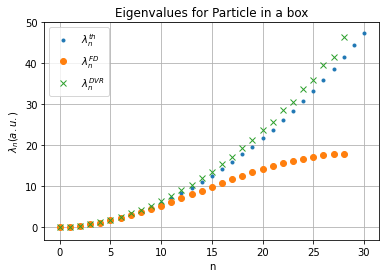

In [ ]:
'''
Plotting the three sequences for particle in a box
'''

plt.figure()
plt.plot(SPth_part,'.',label='$\lambda_n^{th}$')
plt.plot(SpFD_part,'o',label='$\lambda_n^{FD}$')
plt.plot(SpDVR_part,'x',label='$\lambda_n^{DVR}$')
plt.legend()
plt.xlabel('n')
plt.ylabel('$\lambda_n(a.u.)$')
plt.title('Eigenvalues for Particle in a box')
plt.ylim((-3,50))
plt.grid()
plt.show()

The comparison of the spectrum calculated from the numerical Hamiltonian and theoretical spectrum is shown in the above graph. The eigenvalues represent the allowed energy values for the particle in a box. These energy values are quantized as a consequence of the standing waves and discrete due to the presence of a restraining potential. 

For the particle in a box we notice that initially for smaller values of n, the eigenvalues calculated from the numerical Hamiltonians are coherent with the theoretical eigenvalues. However, as the values of n gets larger, around n = 12, there is a deviation of the numerically calculated eigenvalues from the theoretical ones. The error factor and deviation from the theoretical spectrum of H, at larger n values, are greater for the eigenvalues found using the Finite Difference Representation as compared to the Discrete Variable Representation. Hence, from this we can conclude that the Discrete Variable Representation is a better choice to represent the spectrum (Sp(H)) for a particle in a box.

From this, we can conclude that using the FFT to calculate spatial derivatives is not only fast, but extremely accurate and often faster and more accurate than finite difference method, like in this case.

### **3) The eigenvectors of the numerical Hamiltonians**

The renormalized eigenvectors using both FDR and DVR are represented below.

In [ ]:
'''
Compute the eigen vectors of numerical Hamiltonians for particle in a box

'''
eigenvectorsFD_part = eigenFD_part[1] # eigen vectors given by the second column of the output from LA.eigh

# Normalisation of the eigenvectors
eigenvectorsFD_part = (1/np.sqrt(DeltaX)) * np.transpose(eigenvectorsFD_part) # taking the transpose of the eigenvectors

eigenvectorsDVR_part = eigenDVR_part[1] # eigen vectors given by the second column of the output from LA.eigh

# Normalisation of the eigenvectors
eigenvectorsDVR_part = (1/np.sqrt(DeltaX)) * np.transpose(eigenvectorsDVR_part) # taking the transpose of the eigenvectors

print(eigenvectorsFD_part )

[[ 2.10359474e-11  4.67465499e-02  9.29809348e-02  1.38196601e-01
   1.81898157e-01  2.23606798e-01  2.62865556e-01  2.99244304e-01
   3.32344469e-01  3.61803399e-01  3.87298335e-01  4.08549949e-01
   4.25325404e-01  4.37440905e-01  4.44763713e-01  4.47213595e-01
   4.44763713e-01  4.37440905e-01  4.25325404e-01  4.08549949e-01
   3.87298335e-01  3.61803399e-01  3.32344469e-01  2.99244304e-01
   2.62865556e-01  2.23606798e-01  1.81898157e-01  1.38196601e-01
   9.29809348e-02  4.67465499e-02  2.10359474e-11]
 [-4.18414206e-11 -9.29809348e-02 -1.81898157e-01 -2.62865556e-01
  -3.32344469e-01 -3.87298335e-01 -4.25325404e-01 -4.44763713e-01
  -4.44763713e-01 -4.25325404e-01 -3.87298335e-01 -3.32344469e-01
  -2.62865556e-01 -1.81898157e-01 -9.29809348e-02  3.83280370e-15
   9.29809348e-02  1.81898157e-01  2.62865556e-01  3.32344469e-01
   3.87298335e-01  4.25325404e-01  4.44763713e-01  4.44763713e-01
   4.25325404e-01  3.87298335e-01  3.32344469e-01  2.62865556e-01
   1.81898157e-01  9.2980

### **4) The wave functions corresponding to n = 1, 2 and 3**

Here the theoretical waves functions can be calculated using the following equation:

$$
\phi_n^{th}(x) = \sqrt{\frac{2}{x_{max}}}sin(\frac{n\pi x}{x_{max}})
$$
    

In [ ]:
'''
Theoretical wave functions, eigen vectors of particle in a box

'''

phiTH_part = np.zeros((Nstep+1,Nstep+1)) # Initialising a matrix for theoretical wave functions

for i in range(0,Nstep+1):
    for x in range(0,Nstep+1):
        phiTH_part[i][x] = np.sqrt(2/xmax)*np.sin(((i+1)*np.pi*Xd[x])/xmax) # Defining the theoretical wave functions

In order to make a comparison between the eigenvectors we found in two representations, $\phi_n^{FD}(x)$ and $\phi_n^{DVR}(x)$, we plot them below.

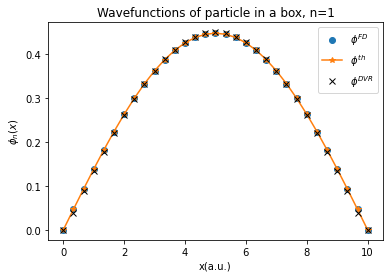

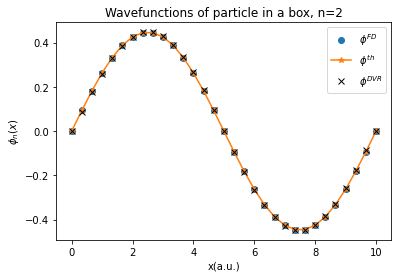

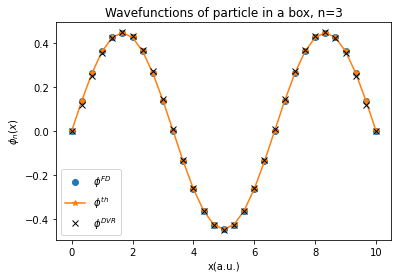

In [ ]:
'''
Comparing the wave functions of particles in a box

'''

plt.figure()
plt.plot(Xd, eigenvectorsFD_part[0,:]  ,'o' ,label='$\phi^{FD}$')
plt.plot(Xd, phiTH_part[0,:]           ,'*-',label='$\phi^{th}$')
plt.plot(Xd, -eigenvectorsDVR_part[0,:],'kx',label='$\phi^{DVR}$')
plt.legend()
plt.ylabel('$\phi_n(x)$')
plt.xlabel('x(a.u.)')
plt.title('Wavefunctions of particle in a box, n=1')


plt.figure()
plt.plot(Xd, -eigenvectorsFD_part[1,:], 'o' , label='$\phi^{FD}$')
plt.plot(Xd, phiTH_part[1,:]          , '*-', label='$\phi^{th}$')
plt.plot(Xd, eigenvectorsDVR_part[1,:], 'kx', label='$\phi^{DVR}$')
plt.legend()
plt.ylabel('$\phi_n(x)$')
plt.xlabel('x(a.u.)')
plt.title('Wavefunctions of particle in a box, n=2')

plt.figure()
plt.plot(Xd,-eigenvectorsFD_part[2,:],'o',label='$\phi^{FD}$')
plt.plot(Xd,phiTH_part[2,:],'*-',label='$\phi^{th}$')
plt.plot(Xd,eigenvectorsDVR_part[2,:],'kx',label='$\phi^{DVR}$')
plt.legend()
plt.ylabel('$\phi_n(x)$')
plt.xlabel('x(a.u.)')
plt.title('Wavefunctions of particle in a box, n=3')
plt.show()

The three diagrams above illustrate the eigenvectors $\phi_n^{FD}(x), \phi_n^{DVR}(x)$ and $\phi_n^{th}(x)$ for n = 1, 2 and 3 respectively. We multiply by -1 to account for the random choice of phase of the programs. 

The $\phi_n(x)$ are the wavefunctions of the particle, square of which  give us the probability of finding the particle at a certain position within the box with the corresponding eigenvalues of  energy . Here, we have an inifinite potential well located between \[0,L\]. Thus, there is a production of standing waves associated with the spectrum. The quantum state of particle in a box has nodes associated with it. There are points, other than the two end points fixed by the boundary conditions, at which the wavefunction vanishes. The probability of finding a particle at node is exactly zero. The total number of nodes is given by n-1. 

It can be observed in the graph that wavefunctions obtained from the Numerical Hamiltonians using both Finite Difference and DVR representation concur with high coherence to the theoretically calculated wavefunctions. Thus, the eigenvectors overlap for all the plotted orders of n=1, 2, 3 and the values only vary slightly.

## HARMONIC OSCILLATOR

The second system that is treated is a harmonic oscillator with the given potential:

$$
V(x)=\frac{1}{2}k(x-\frac{x_{max}}{2})^{2}
$$

We take k = 1 a.u. and define $\omega_0 = \sqrt(k/m)$

The initial parameters , the partition vector with the collaction points and the mass are all same for both the harmonic oscillator and particle in a box. Thus, we  use the same constructed Numerical Hamiltonians and add the potential of the Harmonic Oscillator to the constructed $H_{FD}$ and $H_{DVR}$. 

In [ ]:
'''
Defining the potential for a harmonic oscillator

'''
# initial parameters
k = 1.
omega0 = np.sqrt(k/m)

def Potential_HarmonicOscilator(NSTEP, K, X, XMAX):
    '''
    This function makes a matrix for the potential of the harmonic oscillator
    using the parameters.
    
    PARAMETERS
    ----------
    NSTEP: integer
        The number of cells in the partition
    K: float
        The wavenumber
    X: a 1D array of float numbers
        The list of points of the partition
    XMAX: float
        The maximum value of x (in a.u.): [0,xmax]

    RETURNS
    -------
    valV_har: a 1D array of float numbers
        The potential of the harmonic oscilator
    '''
    valV_har = np.zeros(NSTEP+1)                    # initialising a zero matrix for potential

    for i in range(0,NSTEP+1):
        valV_har[i] = (1/2)*K*(X[i] - (XMAX/2))**2  # Defining a matrix for potential
    return valV_har

valV_har = Potential_HarmonicOscilator(Nstep, k, Xd, xmax)

In [ ]:
'''
Adding the potential of the harmonic oscillator to the numerical Hamiltonians

'''          

Vmat_har = np.diag(valV_har) # diagonalising the potential
Hdf_har  = Hdf + Vmat_har    # adding the potential to the kinetic hamiltonian
Hdvr_har = Hdvr + Vmat_har   # adding the potential to the Hamiltonina calculated using the DVR method

### **1) The numerical Hamiltonians and spectrum**

In [ ]:
'''
Computing the two approximations of
the spectrum of the two hamiltonians
of the harmonic oscillator

'''

eigenFD_har = LA.eigh(Hdf_har) # Defining the eigen-values and eigen-vectors of Hdf
eigenDVR_har = LA.eigh(Hdvr_har) # Defining the eigen-values and eigen-vectors of Hdvr

SpFD_har = eigenFD_har[0] # Finding the Spectrum of Hdf - all the eigen-values - given by the first column of the output from LA.eigh
SpDVR_har = eigenDVR_har[0] # Finding the Spectrum of Hdvr - all the eigen-values - given by the first column of the output from LA.eigh

print("The approximation of the spectrum for the hamiltonian of the finite difference method is:\n ",SpFD_har)
print("The approximation of the spectrum for the hamiltonian of the discrete variable method is:\n ",SpDVR_har)

The approximation of the spectrum for the hamiltonian of the finite difference method is:
  [ 0.49650315  1.48241395  2.45397238  3.41084292  4.35266316  5.2790427
  6.18957096  7.08385594  7.96164222  8.82307431  9.66911556 10.50193048
 11.32478433 12.14107348 12.95269483 13.7585724  14.55401273 15.33089053
 16.07703811 16.78291468 17.38145398 18.0642253  18.23976582 19.4326202
 19.43820734 21.22221383 21.22224611 23.60390657 23.6039066  26.9713116
 26.9713116 ]
The approximation of the spectrum for the hamiltonian of the discrete variable method is:
  [ 0.51666667  1.55        2.58333337  3.61666599  4.65000673  5.68327236
  6.71701753  7.74787636  8.79076007  9.7834983  10.9199247  11.67498357
 13.24478767 13.585224   15.91671777 16.03714295 18.9980529  19.04334877
 22.49570708 22.50916848 26.39842126 26.40513051 30.69630576 30.72262118
 35.39377611 35.44742436 40.49956035 40.56037496 45.79067751 46.48900354
 54.37249395]


### **2) Comparing the two spectra $Sp^{FD}(H)$, $Sp^{DVR}(H)$ and $Sp^{th}(H)$**
 
The theoretical spectrum of the harmonic oscillator is defined as:
 $$
Sp^{th}(H)=\left\{ \hbar\omega_{0}(n+\frac{1}{2}),n\in\mathbb{N}\right\} 
 $$

In [ ]:
'''
Computing the theoretical spectrum of the Hamiltonian for Harmonic oscillator

'''

SPth_har = np.zeros(Nstep+1) # initialising a vector for the theretical spectrum of the hamiltoninan

for n in range(0,Nstep+1):
    SPth_har[n] = 1*omega0*(n+0.5) # defining the theoretical spectrum
    

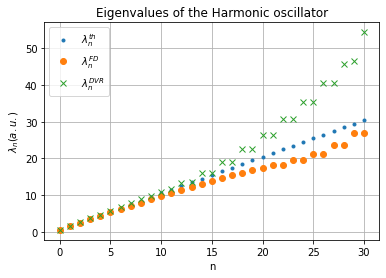

In [ ]:
'''
Plotting the three sequences for the harmonic oscillator

'''

plt.figure()
plt.plot(SPth_har,'.',label='$\lambda_n^{th}$')
plt.plot(SpFD_har,'o',label='$\lambda_n^{FD}$')
plt.plot(SpDVR_har,'x',label='$\lambda_n^{DVR}$')
plt.legend()
plt.xlabel('n')
plt.ylabel('$\lambda_n(a.u.)$')
plt.title('Eigenvalues of the Harmonic oscillator')
plt.grid()
plt.show()

Here we notice again that for lower values of n the eigenvalues corresponding to the Numerical Hamiltonians and the eigen values of theoretically calculated spectra of H concur with each other 

However as n increases and  approaches 10, the eigenvalues of solutions to the Numerical Hamiltonians begins to diverge from the theoretical values calculated from the Hamiltonian represented from DVR method. One obtains the greater deviation and hence error factor. The eigenvalues obtained using the finite difference method deviates slightly from the theoretical values. Therefore we conclude that the Discrete Variable Representation is a better choice for representing the Hamiltonian of a Harmonic Oscillator.


### **3) The eigenvectors of the numerical Hamiltonians**

In [ ]:
'''
Compute the eigen vectors of numerical Hamiltonians for the harmonic oscillator

'''

eigenvectorsFD_har = eigenFD_har[1] # eigen vectors given by the second column of the output from LA.eigh
eigenvectorsFD_har = (1/np.sqrt(DeltaX)) * np.transpose(eigenvectorsFD_har) # Normalisation of the eigenvectors

eigenvectorsDVR_har = eigenDVR_har[1] # eigen vectors given by the second column of the output from LA.eigh
eigenvectorsDVR_har = (1/np.sqrt(DeltaX)) * np.transpose(eigenvectorsDVR_har) # Normalisation of the eigenvectors
print(eigenvectorsDVR_har)
print(eigenvectorsDVR_har)

[[ 3.31784331e-06  1.95660211e-05  8.43138116e-05  3.23484729e-04
   1.11404250e-03  3.44536815e-03  9.56907542e-03  2.38674384e-02
   5.34617662e-02  1.07543077e-01  1.94277846e-01  3.15185167e-01
   4.59208513e-01  6.00835741e-01  7.05997652e-01  7.44993394e-01
   7.05997652e-01  6.00835741e-01  4.59208513e-01  3.15185167e-01
   1.94277846e-01  1.07543077e-01  5.34617662e-02  2.38674384e-02
   9.56907542e-03  3.44536815e-03  1.11404250e-03  3.23484729e-04
   8.43138116e-05  1.95660211e-05  3.31784331e-06]
 [-3.55283115e-05 -1.29877074e-04 -5.09025936e-04 -1.80036552e-03
  -5.68294355e-03 -1.59775401e-02 -3.99379836e-02 -8.85460825e-02
  -1.73546106e-01 -2.99231447e-01 -4.50470969e-01 -5.84654484e-01
  -6.38858545e-01 -5.57261805e-01 -3.27398570e-01  2.98516223e-15
   3.27398570e-01  5.57261805e-01  6.38858545e-01  5.84654484e-01
   4.50470969e-01  2.99231447e-01  1.73546106e-01  8.85460825e-02
   3.99379836e-02  1.59775401e-02  5.68294355e-03  1.80036552e-03
   5.09025936e-04  1.2987

### **4) The wave functions corresponding to n = 1, 2 and 3**

The theoretical wavesfunctions can be calculated using the following equation:

$$
\phi_{n}^{th}(x)=\frac{1}{\sqrt{2^{n}n!}}\left(\frac{m\omega_{0}}{\pi\hbar}\right)^{1/4}H_{n}\left(\sqrt{\hbar^{-1}m\omega_{0}}(x-\frac{x_{max}}{2})\right)e^{-\frac{m\omega_{0}}{2\hbar}(x-\frac{x_{mas}}{2})^{2}}
$$

where, $H_n$ is the n-th Hermite polynomial.

In [ ]:
'''
Theoretical wave functions, eigen vectors of the harmonic oscillator

'''

phiTH_har = np.zeros((Nstep+1,Nstep+1)) # initialising a matrix for the theoretical values

for n in range(0,Nstep+1):
    for x in range(0,Nstep+1):
        sub = Xd[x] - (xmax/2)
        phiTH_har[n][x] = (1/sqrt(2**n*factorial(n)))*((m*omega0/np.pi*1)**(1/4))*sp.eval_hermite(n,sqrt(1*m*omega0)*sub)*np.exp(-m*omega0/2*1*sub**2) # Defining the theoretical wave functions 
        

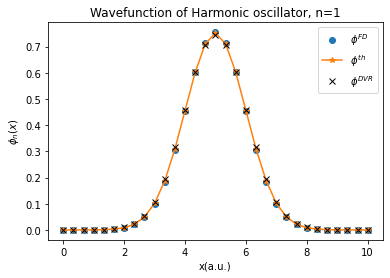

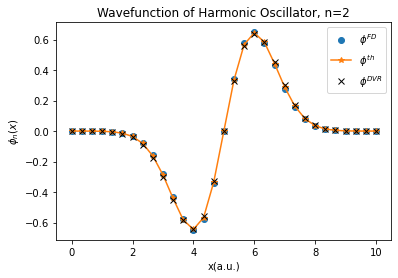

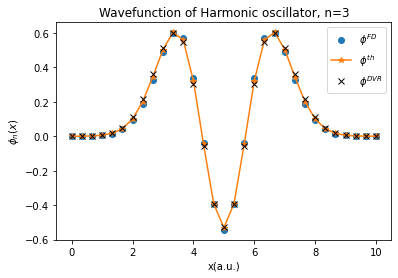

In [ ]:
'''
Comparing the wave functions of the harmonic oscillator

'''
plt.figure()
plt.plot(Xd,eigenvectorsFD_har[0,:],'o',label='$\phi^{FD}$')
plt.plot(Xd,phiTH_har[0,:],'*-',label='$\phi^{th}$')
plt.plot(Xd,eigenvectorsDVR_har[0,:],'kx',label='$\phi^{DVR}$')
plt.legend()
plt.ylabel('$\phi_n(x)$')
plt.xlabel('x(a.u.)')
plt.title('Wavefunction of Harmonic oscillator, n=1')

plt.figure()
plt.plot(Xd,eigenvectorsFD_har[1,:],'o',label='$\phi^{FD}$')
plt.plot(Xd,phiTH_har[1,:],'*-',label='$\phi^{th}$')
plt.plot(Xd,eigenvectorsDVR_har[1,:],'kx',label='$\phi^{DVR}$')
plt.legend()
plt.ylabel('$\phi_n(x)$')
plt.xlabel('x(a.u.)')
plt.title('Wavefunction of Harmonic Oscillator, n=2')

plt.figure()
plt.plot(Xd,-eigenvectorsFD_har[2,:],'o',label='$\phi^{FD}$')
plt.plot(Xd,phiTH_har[2,:],'*-',label='$\phi^{th}$')
plt.plot(Xd,-eigenvectorsDVR_har[2,:],'kx',label='$\phi^{DVR}$')
plt.legend()
plt.ylabel('$\phi_n(x)$')
plt.xlabel('x(a.u.)')
plt.title('Wavefunction of Harmonic oscillator, n=3')
plt.show()

The boundary condition is satisfied when the wavefunction of the Harmonic oscillator is of gaussian form. The gaussian wavefunction associated with the given quantum number n is multipled by Hermite polynomial of order n and constant necessary for normalization.

It can be seen from the definition of potential that when the x approaches infinty the potential energy approaches infinity. Hence the wavefunction must converge to zero.
To account for this behaviour, we use the Hermite polynomials. The decreasing exponential term overpowers rest of the terms of the polynomial so that the overall wavefunction converges to zero at large values of x.

Similar to the particle in a box, the wave functions that are found from the Numerical Hamiltonians, FD and DVR, and the theoretically calculated wave functions overlap with each other and concur. The values of the wavevector also varies slightly.




## $H^+_2$ molecule

---


For the last system we study $H^+_2$ ion vibrational states. The potential is
$$
V(x)=V_{0}\left(e^{-2 a\left(x-x_{0}\right)}-2 e^{-a\left(x-x_{0}\right)}\right)
$$


molecular ion $H_2^+$ in the bound electronic state $\sideset{2}{}\sum_{g}^{+}$ viewed only form the viewpoint of its vibrational states. 

Thus for this system, we modify the data by choosing $x_{max}$ = 15 a.u., $m = 911.489$ a.u. and $N_{step}$ as atleast 50. 

Here it can be easily seen that $V(x=x_{0})= -V_{0}$, where a is the Bohr radius of the given molecule.

The initial data for the numerical simulation of this system are:

In [ ]:
'''
H2+ Molecule

'''

# CHANGE IN INITIAL PARAMETERS

xmax_H = 15. # maximum value of x (in a.u.): [0,xmax]
m_H = 911.489  # particle mass in a.u.
Nstep_H = 50 # number of cells in the partition - changed to 50
DeltaX_H = (xmax_H - xmin)/Nstep_H # ∆x, partition step (in atomic unit)

Xd_H = np.linspace(xmin,xmax_H,Nstep_H+1) # list of points of the partition

Using these data we can implement the potential for the ion $H^+_2$:

In [ ]:
'''
(Anharmonic) Vibration potential 

'''

# Initialising the parameters required for the potential
V0 = 0.10262 
a = 0.72
x0 = 2

valV_H = np.zeros(Nstep_H+1) # initialising a zero matrix for potential

for x in range(0, Nstep_H+1):
    valV_H[x] = V0*(np.exp(-2*a*(Xd_H[x]-x0)) - (2*np.exp(-a*(Xd_H[x]-x0)))) # Defining the potential for the H2+ molecule

### I) A comparison between the potentials of $H^+_2$ and the harmonic oscillator

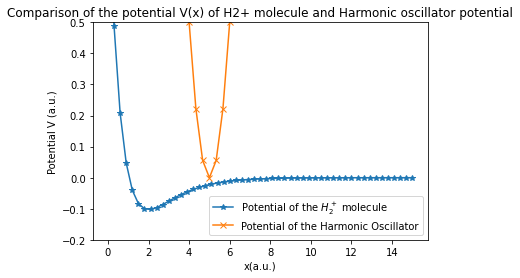

In [ ]:
'''
Comparing the potential V (x) of H2+ molecule and harmonic oscillator potential.
 
'''

plt.figure()
plt.plot(Xd_H,valV_H,'*-',label='Potential of the $H_2^+$ molecule')
plt.plot(Xd,valV_har,'x-',label='Potential of the Harmonic Oscillator')
plt.legend()
plt.ylabel('Potential V (a.u.)')
plt.xlabel('x(a.u.)')
plt.ylim(-0.2,0.5)
plt.title('Comparison of the potential V(x) of H2+ molecule and Harmonic oscillator potential')
plt.show()


The potential of an $H_2^+$ molecule is modelled using the Morse potential. From the definition of the potential for the harmonic oscillator and the plot above, we can conclude that the energy levels of a Harmonic oscillator is evenly spaced by $\hbar \omega_0$. However, in the case of the Morse potential the spacing between the energy levels decreases as the energy approaches the energy of dissociation of the hydrogen molecule. Here x is the distance between the atoms and there exists an equilibrium bond distance for which the energy becomes minimum.

Another point to compare here is that for the potential less than the dissociation potential the shape of the More potential resembles the Harmonic oscilator, despite the less symmetric shape in the case of Moorse potential.

### II-1) The numerical Hamiltonians and spectrum

In [ ]:
# CONSTRUCTION OF NUMERICAL HAMILTONIANS

Hdf = Kinetic_Hamiltonian_FD(Nstep_H, DeltaX_H, m_H)
Hdvr= Kinetic_Hamiltonian_DVR(Nstep_H, xmax_H, m_H)

In [ ]:
'''
Adding the potential of the H_2+ molecule to the numerical Hamiltonians
'''          
Vmat_H2 = np.diag(valV_H)  # diagonalising the potential
Hdf_H2  = Hdf + Vmat_H2     # adding the potential to the kinetic hamiltonian
Hdvr_H2 = Hdvr + Vmat_H2    # adding the potential to the Hamiltonina calculated using the DVR method

In [ ]:
'''
Computing the two approximations of
the spectrum of the two hamiltonians
of the ion

'''

eigenFD_H2 = LA.eigh(Hdf_H2)  # Defining the eigen-values and eigen-vectors of Hdf
eigenDVR_H2= LA.eigh(Hdvr_H2) # Defining the eigen-values and eigen-vectors of Hdvr

SpFD_H2 = eigenFD_H2[0]  # Finding the Spectrum of Hdf  - all the eigen-values - given by the first column of the output from LA.eigh
SpDVR_H2= eigenDVR_H2[0] # Finding the Spectrum of Hdvr - all the eigen-values - given by the first column of the output from LA.eigh

### **II-2) Comparing the two spectra $Sp^{FD}(H)$, $Sp^{DVR}(H)$ and $Sp^{th}(H)$**
 
The total number of bound states of the Hydrogen molecule is 0 $\leq$ v $\leq$ 18. Since, there are no theoretical spectrum for the vibration of $H_2^+$ molecule, we are given 19 values which are results of an accurate computation to compare with our calculated values using the two approximation methods, FDR and DVR. After initialising the given values we plot all three results in the following code.

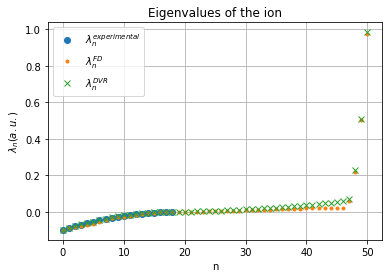

In [ ]:
# Computed values
Sp_pp = np.array([-9.731, -8.711, -7.748, -6.841, -5.991, -5.195, -4.459,
                  -3.778, -3.153, -2.585, -2.073, -1.618, -1.218, -0.876,
                  -0.590, -0.360, -0.187, -0.070, -0.062])*0.01

plt.figure()
plt.plot(Sp_pp,'o',label='$\lambda_n^{experimental}$')
plt.plot(SpFD_H2,'.',label='$\lambda_n^{FD}$')
plt.plot(SpDVR_H2,'x',label='$\lambda_n^{DVR}$')
plt.legend()
plt.xlabel('n')
plt.ylabel('$\lambda_n(a.u.)$')
plt.title('Eigenvalues of the ion')
plt.grid()
plt.show()

We see that for the chosen initial parameters, the values coincide with each other and both FDR and DVR representations give values close to the calculated eigenvalues. Hence, in the case of the $H_2^+$ molecule, the choice of the representation is arbitary and any representation can be used to model the Hamiltonian.

### **II-3) The eigenvectors of the numerical Hamiltonians**
Below, we represent the renormalized eigenvectors using both FDR and DVR representations.

In [ ]:
'''
Compute the eigen vectors of numerical Hamiltonians for the H2+ molecule

'''
# Eigenvectors (given by the second column of the output from LA.eigh)
eigenvectorsFD_H = eigenFD_H2[1]

# Normalisation of the eigenvectors
eigenvectorsFD_H = (1/np.sqrt(DeltaX_H)) * np.transpose(eigenvectorsFD_H)

# Eigenvectors (given by the second column of the output from LA.eigh)
eigenvectorsDVR_H= eigenDVR_H2[1]

# Normalisation of the eigenvectors
eigenvectorsDVR_H = (1/np.sqrt(DeltaX_H)) * np.transpose(eigenvectorsDVR_H)

print(eigenvectorsFD_H)
print(eigenvectorsDVR_H)

[[-8.90592921e-10 -1.56583698e-07 -1.53781043e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.12942237e-09  3.71252534e-07  3.59130069e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.53619941e-09 -4.39399905e-07 -4.20249780e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.20443540e-04  3.96219189e-02  1.82400415e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.35216281e-02 -1.82516005e+00  3.96304515e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.82559031e+00  2.35230426e-02 -1.90208961e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[-6.97052152e-06  1.86240571e-05 -4.67517711e-05 ... -2.12686338e-05
   2.92713340e-05 -4.62662022e-05]
 [ 3.05378065e-05 -7.22320582e-05  1.52005375e-04 ...  1.41068684e-04
  -1.75670916e-04  2.49286995e-04]
 [-4.36269227e-05  8.59106264e-05 -1.06496914e-04 ... -2.93399670e-04
   3.41270599e-04 -4.43445864e-04]
 ...
 [ 6.85088566e-03 -8.41248119e-02 -1.8176861

### **II-4) The wave functions corresponding to n = 1, 2 and 3**
In order to make a comparison between the eigenvectors we found in two representations, $\phi_n^{FD}(x)$ and $\phi_n^{DVR}(x)$, we plot them below.

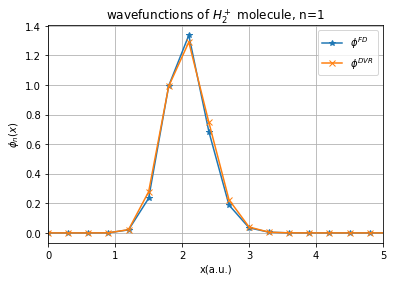

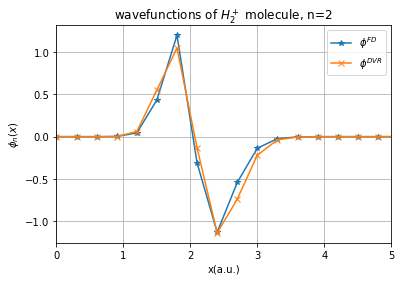

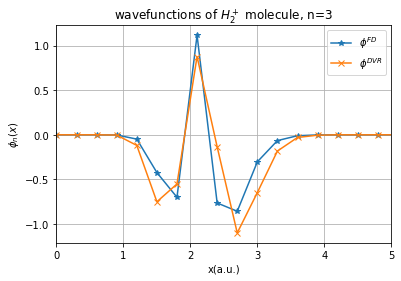

In [ ]:
'''
Comparing the wave functions calculated from the numerical hamiltonian of the H2+ molecule

'''

plt.figure()
plt.plot(Xd_H,-eigenvectorsFD_H[0,:],'*-',label='$\phi^{FD}$')
plt.plot(Xd_H,eigenvectorsDVR_H[0,:],'-x',label='$\phi^{DVR}$')
plt.legend()
plt.ylabel('$\phi_n(x)$')
plt.xlabel('x(a.u.)')
plt.xlim((0, 5))
plt.title('wavefunctions of $H_2^+$ molecule, n=1')
plt.grid()

plt.figure()
plt.plot(Xd_H,eigenvectorsFD_H[1,:],'*-',label='$\phi^{FD}$')
plt.plot(Xd_H,-eigenvectorsDVR_H[1,:],'-x',label='$\phi^{DVR}$')
plt.legend()
plt.ylabel('$\phi_n(x)$')
plt.xlabel('x(a.u.)')
plt.xlim((0, 5))
plt.title('wavefunctions of $H_2^+$ molecule, n=2')
plt.grid()

plt.figure()
plt.plot(Xd_H,eigenvectorsFD_H[2,:],'*-',label='$\phi^{FD}$')
plt.plot(Xd_H,-eigenvectorsDVR_H[2,:],'-x',label='$\phi^{DVR}$')
plt.legend()
plt.ylabel('$\phi_n(x)$')
plt.xlabel('x(a.u.)')
plt.xlim((0, 5))
plt.title('wavefunctions of $H_2^+$ molecule, n=3')
plt.grid()
plt.show()

The graphs above make comparison for the eigenvectors of the $H_2^+$ molecule where the order n = 1, 2 and 3 respectively. Here, the square of the wave functions gives the probability of finding an electron at any given radial distance for the given molecule.

The wave functions obtained using the FDR and DVR representations, overlap with each other very well for smaller orders of n. For n=1 there are small variations only for 4 eigenvectors. For n=2 and n=3 the variations become more and more important and for more numbers of eigenvectors, as we have the variations for 5  and 8 eigenvectors, respectively.



### III) The numerical $Sp_{cont}(H)$ with respect to $x_{max}$ and $Nstep$

In order to make the study easier we implemented the needed parts of the codes in the following function:

In [ ]:
def spectrum_analyzer(xmin, xmax, m, V0, a, x0, Nstep):
    DeltaX  = (xmax-xmin)/Nstep              # ∆x, partition step (in a.u.)
    Xd      = np.linspace(xmin,xmax,Nstep+1) # list of points of the partition
    DeltaX_H= (xmax - xmin)/Nstep            # ∆x, partition step (in atomic unit)
    #------------------------------------
    '''initialising a matrix for potential'''
    valV_H2 = np.zeros(Nstep+1)
    for j in range(0,Nstep+1):
        valV_H2[j] = V0*(np.exp(-2*a*(Xd[j] - x0)) -2*np.exp(-a*(Xd[j] - x0)))
    #------------------------------------
    '''Numerical Hamiltonians'''
    #Kinetic  hamiiltoninanns
    Hdf = Kinetic_Hamiltonian_FD(Nstep, DeltaX, m)
    Hdvr= Kinetic_Hamiltonian_DVR(Nstep, xmax, m)
    #The etotal numerical Hamiltonians
    Vmat_H2 = np.diag(valV_H2)  # diagonalising the potential
    Hdf_H2  = Hdf  + Vmat_H2     # adding the potential to the kinetic hamiltonian
    Hdvr_H2 = Hdvr + Vmat_H2    # adding the potential to the Hamiltonina calculated using the DVR method
    #------------------------------------
    '''The spectrum of the two hamiltonians'''
    eigenFD_H2 = LA.eigh(Hdf_H2)  # the eigenvalues and eigenvectors (Hdf)
    eigenDVR_H2= LA.eigh(Hdvr_H2) # the eigenvalues and eigenvectors (Hdvr)

    SpFD_H2  = eigenFD_H2[0]      # the Spectrum (Hdf)
    SpDVR_H2 = eigenDVR_H2[0]     # the Spectrum (Hdvr)
    return SpFD_H2, SpDVR_H2

The initial values are the same as what we defined for $H_2^+$, except for $x_{max}$ and $N_{step}$ which we prefered to have more values for them in an array:

In [ ]:
Nstep = np.array([20, 30, 50, 80]) # an array of different number of cells in the partition
xmax = np.array([10., 15., 30.])   # an array of different maximum values for x (in a.u.)

Below, we plot two figures to study the spectrum with respect to different xmax values:

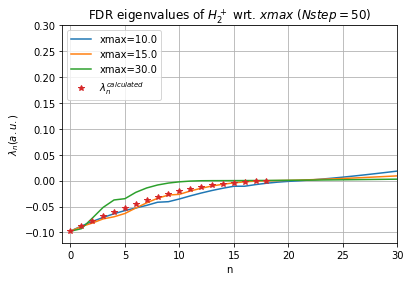

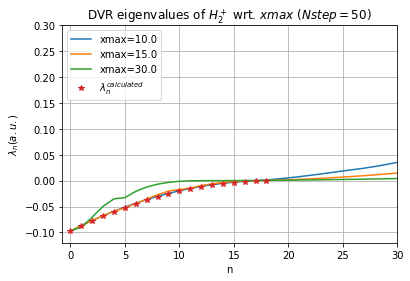

In [ ]:
plt.figure()
for i in range(len(xmax)):
    SpFD_H2 = spectrum_analyzer(xmin, xmax[i], m_H, V0, a, x0, Nstep[2])[0]
    plt.plot(SpFD_H2, label='xmax={}'.format(xmax[i]))
plt.plot(Sp_pp,'*',label='$\lambda_n^{calculated}$')
plt.legend(loc="upper left")
plt.xlabel('n')
plt.xlim(-0.75, 30)
plt.ylim(-0.12,0.3)
plt.ylabel('$\lambda_n(a.u.)$')
plt.title('FDR eigenvalues of $H_2^+$ wrt. $xmax$ ($Nstep=50$)')
plt.grid()

plt.figure()
for i in range(len(xmax)):
    SpDVR_H2 = spectrum_analyzer(xmin, xmax[i], m_H, V0, a, x0, Nstep[2])[1]
    plt.plot(SpDVR_H2, label='xmax={}'.format(xmax[i]))
plt.plot(Sp_pp,'*',label='$\lambda_n^{calculated}$')
plt.legend(loc="upper left")
plt.xlabel('n')
plt.xlim(-0.75, 30)
plt.ylim(-0.12,0.3)
plt.ylabel('$\lambda_n(a.u.)$')
plt.title('DVR eigenvalues of $H_2^+$ wrt. $xmax$ ($Nstep=50$)')
plt.grid()
plt.show()

In the first part, we study the variation of $Sp_{cont}(H)$ with the change in $x_{max}$. 

When $x_{max}$ was chosen to be a small value like that of 10 a.u., 
 one can observe that the deviation of eigenvalues from the (theoretical spectrum)  obtained using finite difference method for the lowe values of n(n=3) whereas the eigenvalues obtained using DVR concur with the teoretical spectrum



For $x_{max} = 15 a.u.$, we have eigenvalues obtained using both the DVR and FD representations are very close to each other. The eigenvalues obtained using DVR has now moved very close to the theoretical spectrum.

However, for $x_{max} = 30 a.u.$ we once again observe a deviation of the eigenvalues obtained from the Numerical Hamiltonians from the theoretical spectrum $Sp_{pp}(H)$. However, for larger $x_{max}$ values, both Finite Difference and DVR representations are inadequate and they fail.

The numerical representation of the Hamiltonian being a (N + 1) order matrix, the sum of the eigenvalue multiplicities is necessarily also (N + 1). If there exists less than (N + 1) eigenvalues in the spectral window, then artifacts appear (a false zero eigenvalue or an artificial increase of the degeneracy of the zero eigenvalue). If the number of eigenvalues in the spectral window is larger than (N + 1) then some eigenvalues are lost in the numerical representation. Hence the spectral value should be chosen carefully to include all the eigen values.

Hence we widened the interval \[$x_{min},x_{max}$\] by increasing the value of $x_{max}$ to 15 a.u. from 10a.u.. This was done in order to obtain the energy eigenvalues that were initially lost, that could not be obtained for lower values of  $x_{max}$. The higher the value of the energies, the interval should be wider so as to locate the nodes. Moreover, along with the increase of $x_{max}$, we should also consider making the partition thinner as it is possible to miss some oscillations in between.

In the following we study the influence of $N_{step}$ on the spectrum:

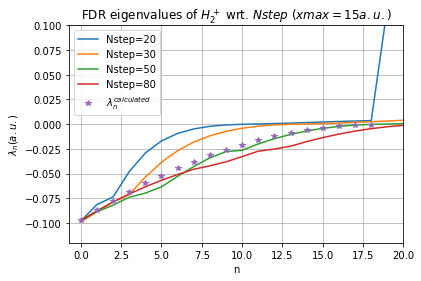

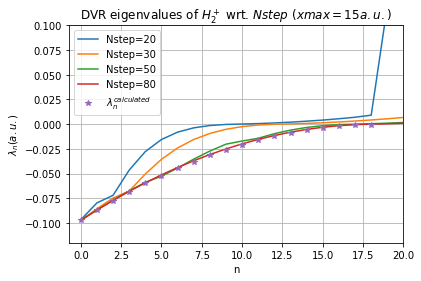

In [ ]:
plt.figure()
for i in range(len(Nstep)):
    SpFD_H2 = spectrum_analyzer(xmin, xmax[1], m_H, V0, a, x0, Nstep[i])[0]
    plt.plot(SpFD_H2, label='Nstep={}'.format(Nstep[i]))
plt.plot(Sp_pp,'*',label='$\lambda_n^{calculated}$')
plt.legend()
plt.xlabel('n')
plt.ylabel('$\lambda_n(a.u.)$')
plt.xlim(-0.75, 20)
plt.ylim(-0.12,0.1)
plt.title('FDR eigenvalues of $H_2^+$ wrt. $Nstep$ ($xmax=15 a.u.$)')
plt.grid()

plt.figure()
for i in range(len(Nstep)):
    SpDVR_H2 = spectrum_analyzer(xmin, xmax[1], m_H, V0, a, x0, Nstep[i])[1]
    plt.plot(SpDVR_H2, label='Nstep={}'.format(Nstep[i]))
plt.plot(Sp_pp,'*',label='$\lambda_n^{calculated}$')
plt.legend()
plt.xlabel('n')
plt.ylabel('$\lambda_n(a.u.)$')
plt.xlim(-0.75, 20)
plt.ylim(-0.12,0.1)
plt.title('DVR eigenvalues of $H_2^+$ wrt. $Nstep$ ($xmax=15 a.u.$)')
plt.grid()
plt.show()

We also plotted for each $Nstep$ the solution using FD, DVR and the one from the calculated values on the same plots (in the follwoing $\lambda_n^{th}$ is the same as $\lambda_n^{calculated}$ from the graphs above).

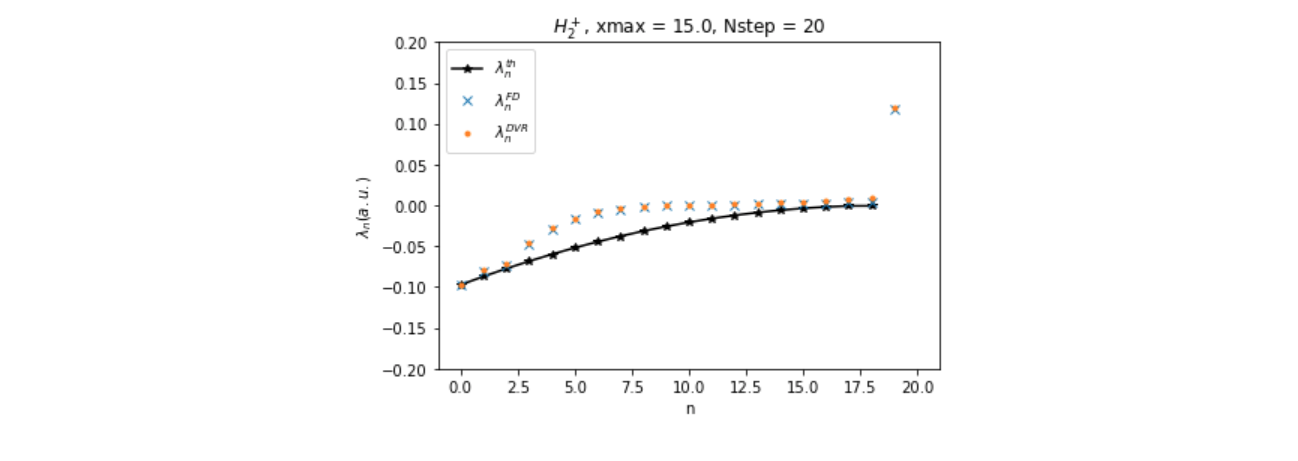

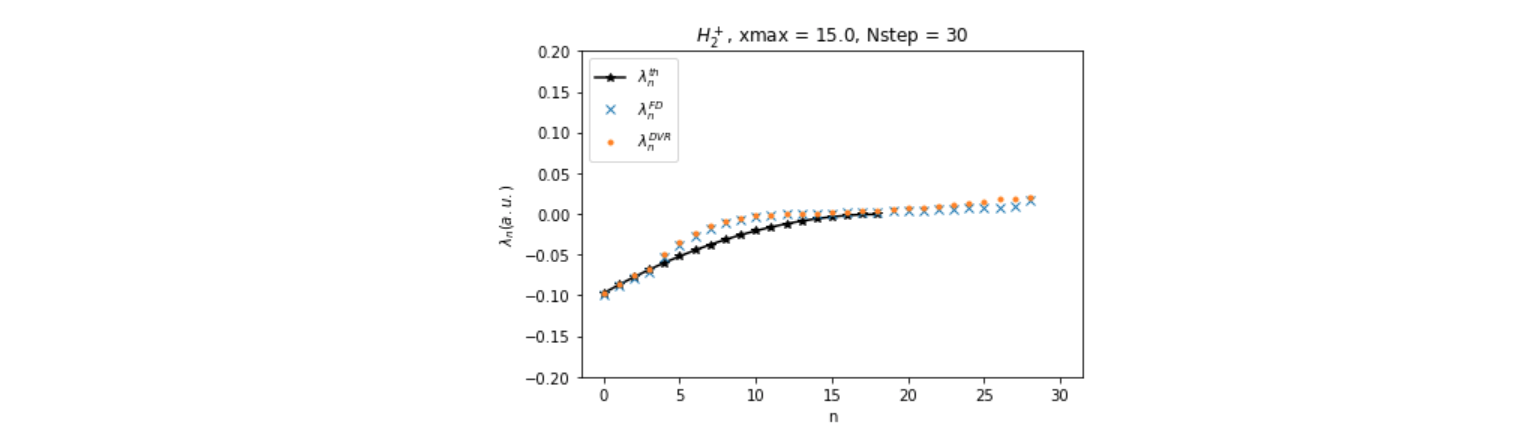

Screenshot 2022-01-18 at 19.40.15.png

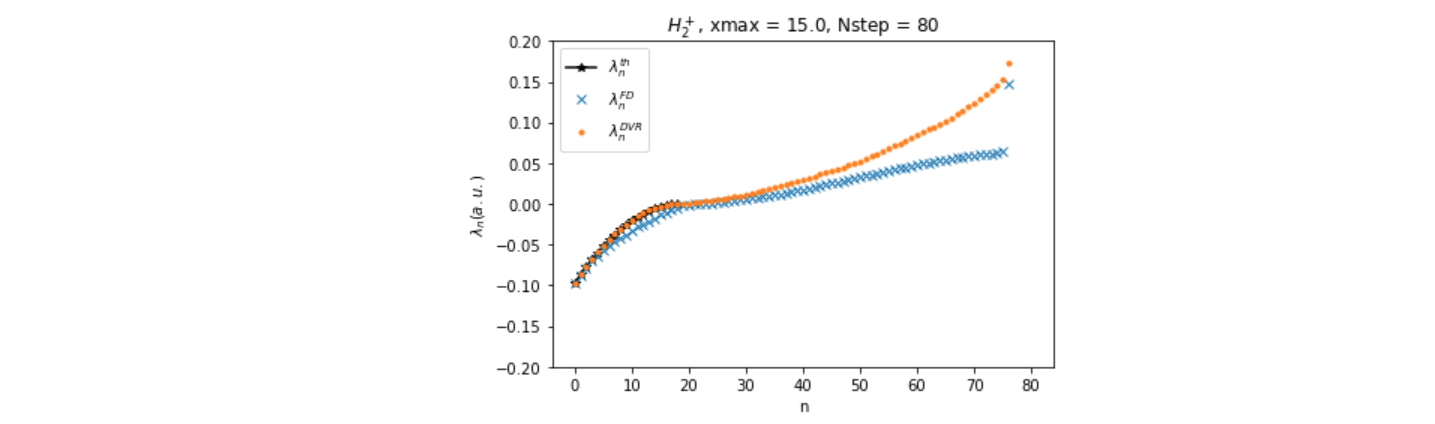

In the second part, we study the variation of $Sp_{cont}(H)$ with the change in $Nstep$.

When we set the value of Nstep to be low , i.e; $N_{step} = 20$ and $N_{step} = 30$, it is observed that the numerically calculated eigenvalues using both the FD and the DVR representations deviate with high error from the theoretical values. For $N_{step} = 30$, the numerically calculated eigen values have shifted closer to the theoretical values but still presents an error in the range n = \[4,15\]. Whereas previously, when $N_{step} = 20$, the deviation was higher and so was the error range which lie between n = \[2,15\].

When $N_{step} = 50$, we observe a  concurrance of the numerically calculated eigenvalues and the theoretical eigenvalues. This was the parameter used for the construction of the Hamiltonian in the practical work.

When $N_{step}$ was further increased to 80, we observe that the eigenvalues obtained using the DVR representation still remained very close to thetheoretical eigenvalues whereas the eigenvalues obtained using the FD representation begins to deviate from the theoretical values. 

We only compare the first 19 values of the energy as beyond that there is onceagain a huge divergence between the two numerically calculated eigenvalues. 


These characteristics are caused by numerical computation of the spectrum where the spatial discretization induces a cut-off causing a loss of resolution of the wave numbers




Thus, it can be concluded then that the discretization step $\Delta x$ must be sufficiently narrow  so that we dont loose the low energy spectrum. For all space discretization step, the very high energy spectrum is lost.

Moreover, it should be noted that two spectral values with gap lower than $\Delta \lambda$ are not numerically distinguishable and the spectral resolution is then more poor at the boundaries of the spectrum.



### CONCLUSION

In summary, in this practical work we have made a detailed comparison of the Finite Difference and Discrete Variable Representation by doing the numerical calculations for three quantum systems; the *particle in a box*, the *harmonic oscillator* and $H_2^+$ molecule. We have also concluded on the more accurate representation for each quantum system. Besides, we studied the characterstics of the numerical computation of the spectrum by studying the numerical representation of $Sp_{cont}(H)$ of the $H_2^+$ molecule with variation of $x_{max}$ and Nstep for both of the numerical methods (FDR and DVR). We saw that for the chosen initial parameters, the values coincided with each other and both FDR and DVR representations gave values close to the calculated eigenvalues. Hence, in the case of the $H_2^+$ molecule, the choice of the representation is arbitary and either of the two representations can be used to model the Hamiltonian.